# **[Week 4] Support Vector Machine Practice**

## **Objective**
###We will utilize **open source machine learning library of Scikit-Learn**
* Task 1: Training SVM with **linearly separable dataset**
* Task 2: Training SVM with dataset including **outliers**
* Task 3: Training **non-linear SVM**
* Task 4 (optional): Iris dataset



## **Recap: What is SVM?**

####Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

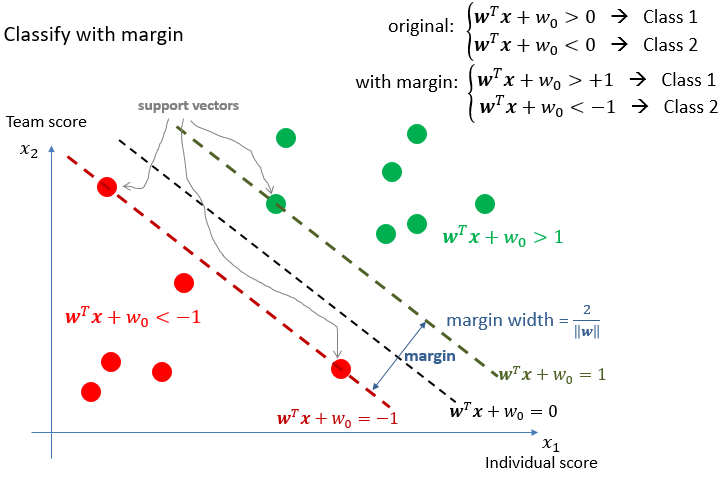

###**Goal:** Find $\mathbf{w}$ that maximizes the margin $\frac{2}{||\mathbf{w}||}$, while correctly separating the training samples 

###$\iff$ Find $\mathbf{w}$ that minimizes $\frac{||\mathbf{w}||^2}{2}$ such that $(\mathbf{w}^T\mathbf{x}_i+w_0)t_i\geq 1$ for all $1\leq i \leq n$ (see lecture note page 29)

---

### However, the above problem have some issues 

###**Issue 1. The solution may lead to overfitting:**

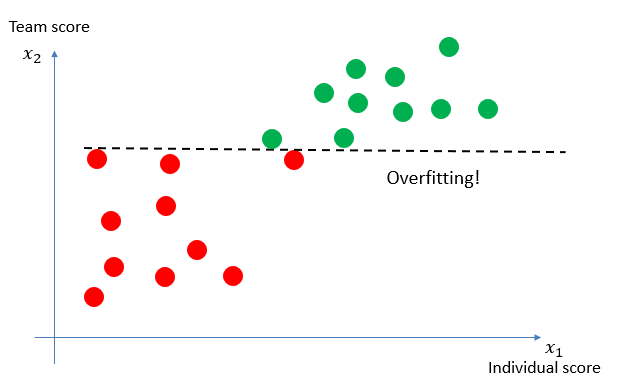

###**Issue 2. The solution may not exist (Data is often not linearly separable):**

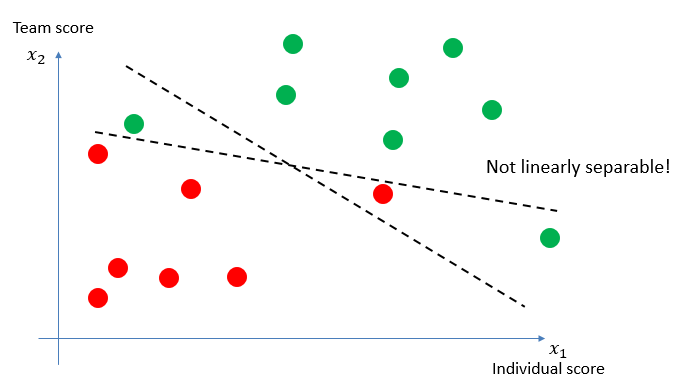

### To handle both issues, we minimize the following loss function:


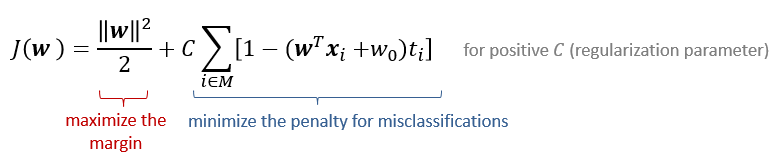

### where $M$ is the misclassified dataset.

### Regularization parameter $C$: Controls the amount of penalty for missclassifcation. A very large $C$ may lead to overfitting, and a very small $C$ may lead to underfitting.

###This problem can be solved via gradient descent (as in pages 40, 41 of the lecture note). **In this practice session, we utilize Scikit-Learn library to train SVM.**

In [ ]:
# Setting
import numpy as np
import sklearn       #### import sklearn 

import matplotlib.pyplot as plt
from sklearn import svm      #### import svm library from sklearn

## **Task 1: The Linearly Separable Case**

###Step 1: Generate samples from normal distributions (exactly the same code with the one in the previous practice session)

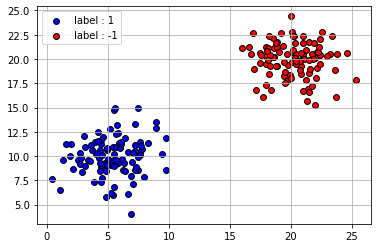

In [ ]:
# generate samples from normal distributions with two dimensional
np.random.seed(10)
n = 100 # size of samples
X1 = np.random.normal(loc=(5, 10), scale=2, size=(n, 2)) # loc and scale indicate mean and variance
X2 = np.random.normal(loc=(20, 20), scale=2, size=(n, 2)) # X1 and X2 have different mean
T1 = np.ones(n)
T2 = np.ones(n) * -1                      # labeling as 1 for X1 and -1 for X2

# concatenate X1 and X2
X_train = np.concatenate((X1, X2))
T_train = np.concatenate((T1, T2))

X1_test = np.random.normal(loc=(5, 10), scale=2, size=(n, 2)) # loc and scale indicate mean and variance
X2_test = np.random.normal(loc=(20, 20), scale=2, size=(n, 2)) # X1 and X2 have different mean
T1_test = np.ones(n)
T2_test = np.ones(n) * -1                      # labeling as 1 for X1 and -1 for X2

# concatenate X1 and X2
X_test = np.concatenate((X1_test, X2_test))
T_test = np.concatenate((T1_test, T2_test))

plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

plt.show()

###Step 2: Training SVM with Linear Kernel

####The samples above are linearly separable.

####Solve the above problem using a Support Vector Machine classifier with linear kernel.

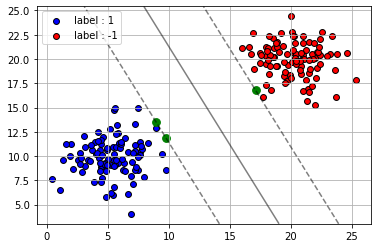

In [ ]:
# Linear Support Vector Classification.
###################################################
clf = svm.SVC(kernel='linear', C=1) ## We use support vector classifer (SVC) in the Scikit-Learn's svm library: We use linear kernel. Regularazation parameter is set to C=1.
clf.fit(X_train, T_train)    ## We train the model on the training data (X_train, T_train), using the fit method.
###################################################

# Visualize
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

axes = plt.gca() 
x_min, x_max = axes.get_xlim() 
y_min, y_max = axes.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30)) # 30 grids for each axis
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = clf.decision_function(xy).reshape(xx.shape)


plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='g') # highlight support vectors
plt.contour(xx, yy, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--']) # draw decision boundary and the parallel lines containing the support vectors  


## **Task 2: Handling Outliers by changing Regularization Parameter**


###Step 1: Add two outlier samples to the training dataset

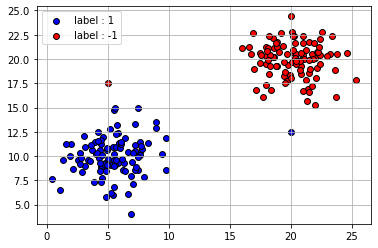

In [ ]:
###### Define two outlier samples
outlier_x1, outlier_x2 = np.array([[20,12.5]]), np.array([[5,17.5]]) 
outlier_t1, outlier_t2 = np.array([1]), np.array([-1])

# concatenate X1, X2 and outliers
X_train = np.concatenate((X1, X2, outlier_x1, outlier_x2))
T_train = np.concatenate((T1, T2, outlier_t1, outlier_t2))
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

axes = plt.gca() 
x_min, x_max = axes.get_xlim() 
y_min, y_max = axes.get_ylim()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30)) # 30 grids for each axis
grids = np.c_[xx.ravel(), yy.ravel()]
plt.show()

###Step 2: Train SVM (with Linear Kernal) with different Regularization parameter $C$  

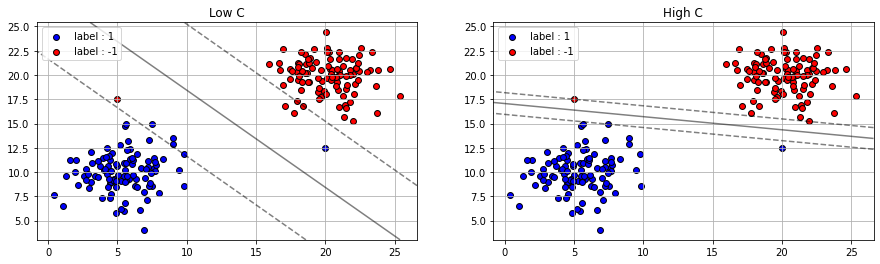

In [ ]:
#Linear Support Vector Classification.

############ Try different C values and check how the decision boundary changes ############  
clf_lowC = svm.SVC(kernel='linear', C=0.01)      ## We use support vector classifer (SVC) in the Scikit-Learn's svm library: We use linear kernel, regularazation parameter is set to C=0.01
clf_highC = svm.SVC(kernel='linear', C=10)       ## We use support vector classifer (SVC) in the Scikit-Learn's svm library: We use linear kernel, regularazation parameter is set to C=10
############################################################################################

############ Train the above two models with fit method ############  
clf_lowC.fit(X_train, T_train)                      ## Train clf_lowC
clf_highC.fit(X_train, T_train)                     ## Train clf_highC
####################################################################



xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z_lowC = clf_lowC.decision_function(xy).reshape(xx.shape)
Z_highC = clf_highC.decision_function(xy).reshape(xx.shape)

plt.figure(figsize=(15,4))
# Visualize

plt.subplot(121)
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()
plt.contour(xx, yy, Z_lowC, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('Low C')



plt.subplot(122)
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()
plt.contour(xx, yy, Z_highC, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('High C')


plt.show()

## **Task 3: Non-Linear SVM**

###Step 1: Generate dataset

array([-4.02776597])

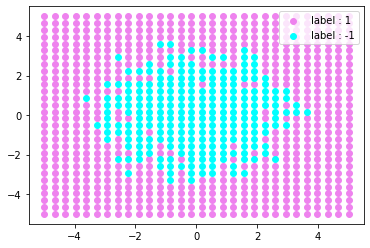

In [ ]:
X1, X2 = np.meshgrid(np.linspace(-5, 5, 30), np.linspace(-5, 5, 30))
X1, X2 = X1.reshape(900,1), X2.reshape(900,1)
X_train = np.concatenate((X1,X2),axis=1)
T_train = np.ones(900)
for idx in range(len(X_train)):
    if X1[idx]**2+X2[idx]**2 < 9+np.random.randn(1)*3:
        T_train[idx] = -1
        
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='violet', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='aqua', label='label : -1', s=35)
plt.legend(loc='upper right')

np.random.randn(1)*2

###Step 2: Train SVM with Non-Linear Kernel

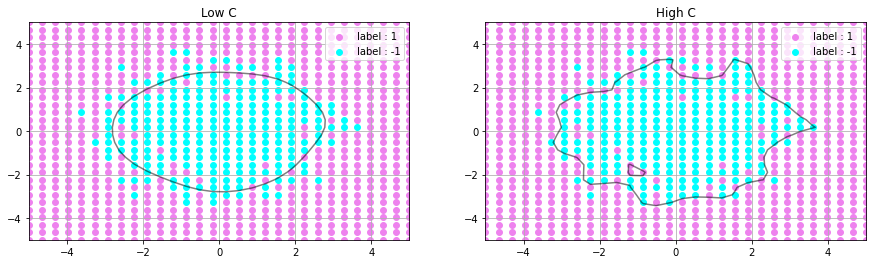

In [ ]:
############ Try different C values and check how the decision boundary changes ############  
clf_lowC = svm.SVC(kernel="rbf", gamma="auto", C=0.1)            ## We use rbf kernel, which is one of non-linear kernel. Regularazation parameter is set to C=0.01
clf_highC = svm.SVC(kernel="rbf", gamma="auto", C=1000)          ## We use rbf kernel, which is one of non-linear kernel. Regularazation parameter is set to C=1000     
############################################################################################

############ Train the above two models with fit method ############  
clf_lowC.fit(X_train, T_train)                      ## Train clf_lowC
clf_highC.fit(X_train, T_train)                     ## Train clf_highC
####################################################################


Z_lowC = clf_lowC.decision_function(X_train).reshape(xx.shape)
Z_highC = clf_highC.decision_function(X_train).reshape(xx.shape)
xx, yy = np.meshgrid(np.linspace(-5, 5, 30), np.linspace(-5, 5, 30))

plt.figure(figsize=(15,4))

plt.subplot(121)
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='violet', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='aqua', label='label : -1', s=35)
plt.grid(True)
plt.legend(loc='upper right')
plt.contour(xx, yy, Z_lowC, colors='k', levels=[0], alpha=0.5)
plt.title('Low C')



plt.subplot(122)
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='violet', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='aqua', label='label : -1', s=35)
plt.grid(True)
plt.legend(loc='upper right')
plt.contour(xx, yy, Z_highC, colors='k', levels=[0], alpha=0.5)
plt.title('High C')

plt.show()

## **Task 4 (Optional): Experiments with Iris Data**


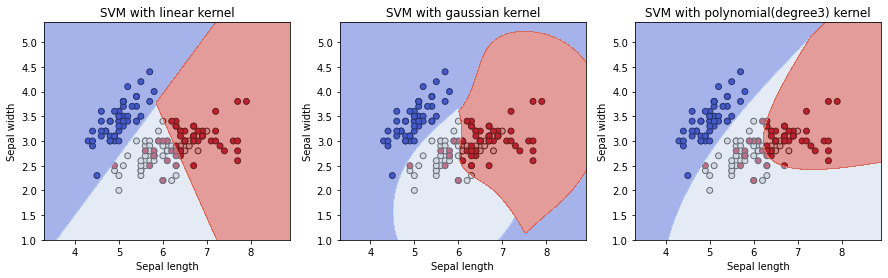

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
X0, X1 = X[:, 0], X[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),  np.linspace(y_min, y_max, 1000))

############ Try different C values and check how the decision boundary changes ############  
C=100   ## Regularization parameter
############################################################################################

## SVM with linear kernel
clf1 = svm.SVC(kernel='linear', C=C)                                
clf1.fit(X,y)
Z1 = clf1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

## SVM with rbf kernel (non-linear)
clf2 = svm.SVC(kernel='rbf', gamma='auto', C=C)
clf2.fit(X,y)
Z2 = clf2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

## SVM with polynomial kernel (non-linear)
clf3 = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)
clf3.fit(X,y)
Z3 = clf3.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(15,4))

plt.subplot(131)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=35)
plt.contourf(xx,yy,Z1,cmap=plt.cm.coolwarm, alpha=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM with linear kernel')

plt.subplot(132)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=35)
plt.contourf(xx,yy,Z2,cmap=plt.cm.coolwarm, alpha=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM with gaussian kernel')

plt.subplot(133)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=35)
plt.contourf(xx,yy,Z3,cmap=plt.cm.coolwarm, alpha=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM with polynomial(degree3) kernel')

plt.show()

### **Reference**

SVM https://scikit-learn.org/stable/modules/svm.html  
LinearSVC https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC  
SVM: Maximum margin separating hyperplane https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py  
Non-linear SVM https://sdsawtelle.github.io/blog/output/week7-andrew-ng-machine-learning-with-python.html  
SVM on Iris data  https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html